In [1]:
import dg
import numpy as np
import torch
import torchvision.transforms as transforms
import torchvision
import matplotlib.pyplot as plt
import time

'''
Here use self developed covolutional neural
'''

'\nHere use self developed covolutional neural\n'

In [2]:
# here data is a PyTorch tensor
def imshow(data):
    img = data / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(npimg.reshape([28,28]), cmap = 'gray')
    plt.show()

def label2onehot(labels):
    b_size = len(labels)
    ret = np.zeros([b_size, 10, 1])
    for i, label in enumerate(labels):
        ret[i][label] = 1
    return ret
def calc_acc(out, label):
    out_tsr   = out.reshape(out.shape[:2])
    label_tsr = label.reshape(label.shape[:2])
    argmax_out = np.argmax(out_tsr, 1)
    argmax_label = np.argmax(label_tsr, 1)
    eq = (argmax_out == argmax_label)
    num_corr = np.count_nonzero(eq)
    return num_corr / len(out_tsr)

In [3]:
# define batch size and data loaders, including train data and test data loaders
batch_size = 25
num_labels = 10

transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.MNIST(root = './data', train = True,
                                      download = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = batch_size,
                                          shuffle = True, num_workers = 2)
testset = torchvision.datasets.MNIST(root='./data', train = False,
                                     download=True, transform = transform)
testloader = torch.utils.data.DataLoader(testset, batch_size = batch_size,
                                         shuffle = False, num_workers = 2)


data from PyTorch data loaders:
x_data[0].type: <class 'torch.Tensor'>
torch.Size([1, 28, 28])
y_data[0].type: <class 'torch.Tensor'>
torch.Size([])


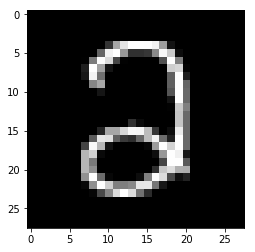

label: tensor(2)


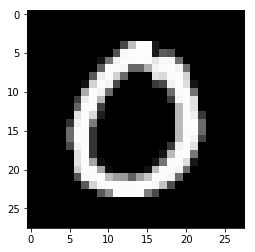

label: tensor(0)


In [4]:
# first take a look at some of the test pictures
train_iter = iter(trainloader)
x_data, y_data = train_iter.next()
print('data from PyTorch data loaders:')
print('x_data[0].type:', type(x_data[0]))
print(x_data[0].shape)
print('y_data[0].type:', type(y_data[0]))
print(y_data[0].shape)
for i in range(2):
    imshow(x_data[i])
    print('label:', y_data[i])

In [5]:
class Net:
    def __init__(self):
        pass
    
    def one_conv_layer(self):
        print('Creating one conv layer CNN...')
        x_entry = x_data.numpy().reshape([batch_size, 28, 28, 1])
        y_entry = label2onehot(y_data).reshape([batch_size, num_labels, 1])
        print('Input image shape:', x_entry.shape)
        print('Y label shape:', y_entry.shape)
        print()
        img_in = dg.identity(x_entry)
        y_label = dg.identity(y_entry)
        conv = dg.cnn.conv(img_in, 5, 6)
        print('added conv layer with filter size: {}, num_filter: {}, stride: {}, padding: {}, out shape: {}'\
              .format(conv.op.filter_size, conv.op.num_filter, conv.op.stride, conv.op.padding, conv.shape()))
        relu = dg.relu(conv)
        print('added relu, shape:', relu.shape())
        pool = dg.cnn.max_pool(relu, 3, stride = 3)
        print('added pool with filter size: {}, stride: {}, padding: {}, out shape: {}'\
              .format(pool.op.filter_size, pool.op.stride, pool.op.padding, pool.shape()))
        fl = dg.reshape(pool, (batch_size, 384, 1))
        print('added reshaped layer, the new shape: ', fl.shape())
        w = dg.identity(np.random.randn(10, 384))
        b = dg.identity(np.random.randn(10, 1))
        print('created parameters w with shape {} and b with shape {}'.format(w.shape(), b.shape()))
        print('w shape:', w.shape())
        fc = dg.mat_mul(w, fl)
        print('added fully connect layer with shape: {}'.format(fc.shape()))
        out = dg.mat_add(fc, b)
        print('added bias to give logits output with shape: {}'.format(out.shape()))
        loss = dg.softmax_cross(out, y_label)
        print('added cross entropy with softmax loss with shape: {}'.format(loss.shape()))
        return loss, out, img_in, y_label, [w,b] + conv.op.params()
    
    def two_conv_layer(self):
        print('Creating two conv layer CNN...')
        x_entry = x_data.numpy().reshape([batch_size, 28, 28, 1])
        y_entry = label2onehot(y_data).reshape([batch_size, num_labels, 1])
        print('Input image shape:', x_entry.shape)
        print('Y label shape:', y_entry.shape)
        print()
        img_in = dg.identity(x_entry)
        y_label = dg.identity(y_entry)
        conv = dg.cnn.conv(img_in, 5, 6)
        print('added conv layer with filter size: {}, num_filter: {}, stride: {}, padding: {}, out shape: {}'\
              .format(conv.op.filter_size, conv.op.num_filter, conv.op.stride, conv.op.padding, conv.shape()))
        relu = dg.relu(conv)
        print('added relu, shape:', relu.shape())
        conv2 = dg.cnn.conv(relu, 5, 12)
        print('added conv layer with filter size: {}, num_filter: {}, stride: {}, padding: {}, out shape: {}'\
             .format(conv2.op.filter_size, conv2.op.num_filter, conv2.op.stride, conv2.op.padding, conv2.shape()))
        relu2 = dg.relu(conv2)
        pool = dg.cnn.max_pool(relu2, 5, stride = 3)
        print('added pool with filter size: {}, stride: {}, padding: {}, out shape: {}'\
              .format(pool.op.filter_size, pool.op.stride, pool.op.padding, pool.shape()))
        fl = dg.reshape(pool, (batch_size, 432, 1))
        print('added reshaped layer, the new shape: ', fl.shape())
        w = dg.identity(np.random.randn(10, 432))
        b = dg.identity(np.random.randn(10, 1))
        print('created parameters w with shape {} and b with shape {}'.format(w.shape(), b.shape()))
        print('w shape:', w.shape())
        fc = dg.mat_mul(w, fl)
        print('added fully connect layer with shape: {}'.format(fc.shape()))
        out = dg.mat_add(fc, b)
        print('added bias to give logits output with shape: {}'.format(out.shape()))
        loss = dg.softmax_cross(out, y_label)
        print('added cross entropy with softmax loss with shape: {}'.format(loss.shape()))
        return loss, out, img_in, y_label, [w,b] + conv.op.params()
        pass

In [6]:
net = Net()
loss, out, x_img, y_label, trainables = net.one_conv_layer()

Creating one conv layer CNN...
Input image shape: (25, 28, 28, 1)
Y label shape: (25, 10, 1)

added conv layer with filter size: (5, 5), num_filter: 6, stride: (1, 1), padding: (0, 0), out shape: (25, 24, 24, 6)
added relu, shape: (25, 24, 24, 6)
added pool with filter size: (3, 3), stride: (3, 3), padding: (0, 0), out shape: (25, 8, 8, 6)
added reshaped layer, the new shape:  (25, 384, 1)
created parameters w with shape (10, 384) and b with shape (10, 1)
w shape: (10, 384)
added fully connect layer with shape: (25, 10, 1)
added bias to give logits output with shape: (25, 10, 1)
added cross entropy with softmax loss with shape: (1,)


In [9]:
# finally, train the built CNN
lr = 0.0001
sgd_optim = dg.optim.SGD(loss, trainables, lr)
epoch = 1
start = time.time()
for e in range(epoch):
    train_iter = iter(trainloader)
    for i, train_data in enumerate(train_iter):
        x_train = train_data[0].numpy().reshape([batch_size, 28, 28, 1])
        y_train = label2onehot(train_data[1]).reshape([batch_size, num_labels, 1])
        sgd_optim.step({x_img:x_train, y_label:y_train})
        if i % 100 == 0:
            print('Loss after training {} batches with batch size {}: {}'.format(i + 1, batch_size, loss.data()))
            print('Accuracy:', calc_acc(out.data(), y_label.data()))
end = time.time()
time_peri = end - start
print('Finished training {} epoches and it cost {} seconds or {} minutes.'.format(epoch, time_peri, round(time_peri / 60, 2)))

Loss after training 1 batches with batch size 25: [3.09048429]
Accuracy: 0.8
Loss after training 101 batches with batch size 25: [1.53012284]
Accuracy: 0.92
Loss after training 201 batches with batch size 25: [4.26565363]
Accuracy: 0.76
Loss after training 301 batches with batch size 25: [0.15377387]
Accuracy: 0.96
Loss after training 401 batches with batch size 25: [2.91129161]
Accuracy: 0.8
Loss after training 501 batches with batch size 25: [2.3262606]
Accuracy: 0.88
Loss after training 601 batches with batch size 25: [0.79851772]
Accuracy: 0.96
Loss after training 701 batches with batch size 25: [0.6354612]
Accuracy: 0.92
Loss after training 801 batches with batch size 25: [3.00969612]
Accuracy: 0.92
Loss after training 901 batches with batch size 25: [5.11040749]
Accuracy: 0.84
Loss after training 1001 batches with batch size 25: [1.19893493]
Accuracy: 0.84
Loss after training 1101 batches with batch size 25: [2.244793]
Accuracy: 0.84
Loss after training 1201 batches with batch si